# Expense Analyzer

- Date : 01/02/2020
- Author : Aditya Warnulkar (adwarnulkar@gmail.com)

In [1]:
# expense from finance app
expenses_file = '/Users/adwarnulkar/workspace/finance_modeling/notebooks/expenses_june_2020.xls' # Expense report from Toshl finance

# budget allocation for this month
budget_file = '/Users/adwarnulkar/workspace/finance_modeling/notebooks/budget_june_2020.csv' # Budget file as per your standard of living

# 401k , HSA , ESPP contribution`
company_deductions = 1376.23 + 1376.23

# Gross - TAX - company deductions
salary = (5428-1766.62) + (5428-1765.50) - company_deductions # Take home salary (After TAX/ESPP/HSA/401K)

In [2]:
salary

4571.42

In [3]:
company_deductions

2752.46

In [4]:
import sys
import os
import re

import pandas as pd
import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook , show
output_notebook()

from src import finance_post_process as fin

Loading BokehJS ...

In [5]:
df_expense = pd.read_excel(expenses_file,skiprows=1)
df_expense.head()

,Date,Account,Category,Tags,Amount,Currency,In main currency,Main currency,Description
0,6/4/20,Cash,Gifts,NaN,16.00,USD,16.00,USD,Sprinkles Deven B'Day
1,6/4/20,Cash,Food & Drinks,NaN,10.18,USD,10.18,USD,Chipotle
2,6/5/20,Cash,Office Lunch,NaN,10.18,USD,10.18,USD,Chipotle
3,6/6/20,Cash,Grocery,NaN,10.17,USD,10.17,USD,Ralph’s personal
4,6/6/20,Cash,Grocery,NaN,23.58,USD,23.58,USD,Ralph’s


In [6]:
df_budget = pd.read_csv(budget_file)
df_budget.set_index('Category',inplace=True)

In [7]:
df_expense = df_expense.groupby('Category').sum()['Amount']

In [8]:
df_expense = pd.concat([df_budget,df_expense],axis=1,sort=False)
df_expense.fillna(0,inplace=True)
df_expense['leverage'] = df_expense['budget'] - df_expense['Amount']
df_expense['leverage_perc'] = 100 * df_expense['leverage'] / df_expense['budget']
df_expense = df_expense.replace([np.inf, -np.inf], np.nan)
df_expense.fillna(0,inplace=True)
df_expense

,budget,Amount,leverage,leverage_perc
Home & Utilities,1345,1395.29,-50.29,-3.739033
Office Lunch,200,30.39,169.61,84.805000
Grocery,250,211.82,38.18,15.272000
Food & Drinks,200,123.88,76.12,38.060000
Bills,150,61.93,88.07,58.713333
Car,143,114.00,29.00,20.279720
Shopping,100,49.11,50.89,50.890000
Fuel,130,75.73,54.27,41.746154
Gifts,50,16.00,34.00,68.000000


In [9]:
print(f"Monthly Expenditure : ${df_expense.Amount.sum():.2f}")

Monthly Expenditure : $2078.15


In [10]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $489.85


## Plotting
- https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

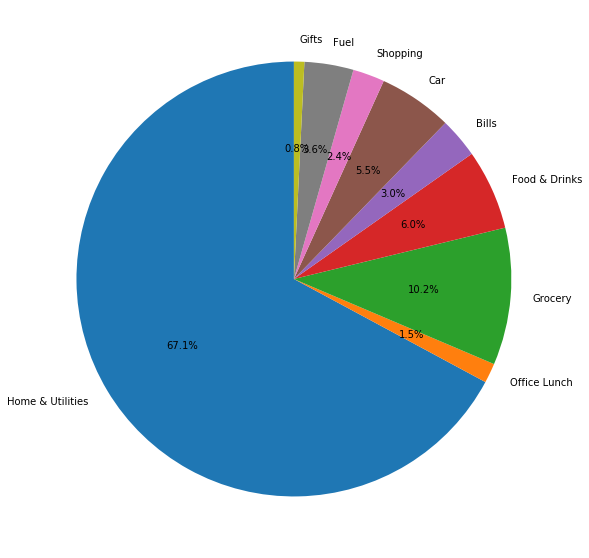

In [11]:
plt.figure(figsize=[10,10])
_ = plt.pie(df_expense.Amount,labels=df_expense.index,shadow=False, startangle=90,autopct='%1.1f%%')

In [12]:
show(fin.plot_expense(df_expense))

# Amount available for investment

In [13]:
salary_take_home = salary
salary_take_home

4571.42

In [14]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $489.85


In [15]:
storage = salary_take_home - df_expense.Amount.sum()
guilt_free_money = 0.1*storage
storage = storage - guilt_free_money
invest_perc = 100*storage/salary_take_home

print(f"Amount available for guilt free expenditure : ${guilt_free_money:.2f}")
print(f"Amount available for investment : ${storage:.2f} {invest_perc:.2f}%")

Amount available for guilt free expenditure : $249.33
Amount available for investment : $2243.94 49.09%


In [16]:
df_goal = pd.read_csv("model_goal_allocation.csv",index_col='goal',usecols=['goal','model_investment'])
df_goal['asset_ratio'] = df_goal.model_investment / df_goal.model_investment.sum()
df_goal['actual_investment'] = df_goal.asset_ratio * storage
df_goal['delta'] = df_goal.actual_investment - df_goal.model_investment
df_goal

,model_investment,asset_ratio,actual_investment,delta
goal,,,,
home,1550.693801,0.507803,1139.480613,-411.213189
vacation,234.204323,0.076694,172.097989,-62.106333
wedding,377.733955,0.123696,277.566415,-100.167541
retirement,891.100000,0.291807,654.797983,-236.302017


In [17]:
df_report = pd.concat([df_expense.Amount,df_goal.actual_investment])

In [18]:
df_report = df_report.append(pd.Series([guilt_free_money],index=['Guilt Free']))

In [19]:
df_report = df_report.to_frame(name='value')
df_report['percentage'] = 100*df_report.value/df_report.value.sum()
df_report

,value,percentage
Home & Utilities,1395.290000,30.522026
Office Lunch,30.390000,0.664782
Grocery,211.820000,4.633571
Food & Drinks,123.880000,2.709880
Bills,61.930000,1.354721
Car,114.000000,2.493755
Shopping,49.110000,1.074283
Fuel,75.730000,1.656597
Gifts,16.000000,0.350001
home,1139.480613,24.926185


In [20]:
df_report.sum()

value         4571.42
percentage     100.00
dtype: float64

In [22]:
df_report.to_csv('report_june_2020.csv')